In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [4]:
def preparing_data(w_true, b=0,n_samples=25, feature_range=(-3, 3),random_seed=42):
    """
    Generate synthetic data for binary classification with labels in {-1, +1}.
    
    Parameters: 
        w_true (numpy array): True weight vector used for computing probabilities.
        b (float): Bias term for the decision function.
        n_samples (int): Number of samples to generate.
        feature_range (tuple): Range for the feature values.
        random_seed (int): Seed for random number generation.
    Returns:
        X (numpy array): Feature matrix of shape (n_samples, 2).
        y (numpy array): Binary labels of shape (n_samples, 1), in the range {-1, +1}.
        probabilities (numpy array): Probabilities of the positive class for each sample.
    
    Example:
        X, y, probabilities = preparing_data(seed=42, n_samples=25, feature_range=(-3, 3), w_true=np.array([1, 2]), b=0)
    """
    rng = np.random.default_rng(seed=random_seed)
    
    # Generate random feature samples
    X = rng.uniform(low=feature_range[0], high=feature_range[1], size=(n_samples, 2))
    
    # Compute probabilities using the sigmoid function
    z = (X @ w_true.T + b).reshape(-1, 1)
    sigmoid = lambda z: 1 / (1 + np.exp(-z))
    probabilities = sigmoid(z)
    
    # Generate binary labels based on probabilities
    y = 2 * (rng.uniform(0, 1, size=(n_samples, 1)) <= probabilities) - 1
    
    return X, y, probabilities

In [11]:
X_train,y,_=preparing_data(w_true=np.array([1,2]),
                b=0,
                n_samples=50,
                feature_range=(-3,3),
                random_seed=42)

In [72]:
def log_loss(w,X,y,b=0):
    """
    Function: Compute the log loss or likelihood estimate with sigmoid activation function
    
    Parameters:
    X: Input feature matrix of shape (n_samples,n_features)
    y: Target for each datapoibt in X_train(n_samples,1)
    w: Weights for the respective datapoints in X_train with shape (1,n_samples)
    b: Bias for the model
    Returns:
    (float):
    """
    y=y.reshape(-1,1) # ensuring the labels as column vector
    z=np.dot(X_train,w.T)+b
    return np.mean(np.log(1+np.exp(-y*z)))

In [73]:
log_loss(w,X_train,y,b=0)

0.37707207073418836

In [89]:
result=opt.minimize(fun=log_loss,x0=[1,1],args=(X_train,y), options={'gtol': 1e-6})
w_optimized=result.x
w_optimized

array([0.00708312, 0.00163415])

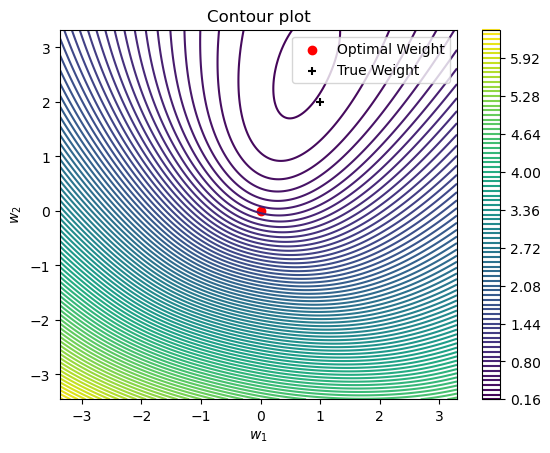

In [88]:
def contour_plot_visualization(X, y, w_optimized, 
                               regularized_loss, w_true,
                               step=0.03,save_fig=True):
    """
    Plot the regularized loss landscape and visualize the optimal and true weights.

    Parameters:
        X (ndarray): Feature matrix (n_samples, n_features).
        y (ndarray): Target labels (n_samples,).
        w_optimized (ndarray): Optimized weight vector.
        w_true (ndarray): True weight vector.
        regularized_loss (function): Function to compute regularized loss.
        reg_param (float): Regularization parameter.
        step (float): Step size for creating the meshgrid.
        save_fig(bool): Saves the the boundary plot in the current folder.
        
    Returns:
        Displays and saves optimization of weights plot 
    """
    # Define ranges for the meshgrid
    x_min = min(X[:, 0]) - 0.5
    x_max = max(X[:, 0]) + 0.5
    y_min = min(X[:, 1]) - 0.5
    y_max = max(X[:, 1]) + 0.5

    # Create meshgrid
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )

    # Flatten meshgrid into points for evaluation
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # Compute regularized losses for each point in the meshgrid
    log_losses = [
        log_loss(
            w=point.reshape(1, -1),  # Reshape each point as a weight vector
            X=X,
            y=y,
            b=0,
        )
        for point in mesh_points
    ]
    # Reshape reg_losses to match the meshgrid
    log_losses = np.array(log_losses).reshape(xx.shape)

    # Plot the contour
    fig, ax = plt.subplots()

    CS = ax.contour(xx, yy, log_losses, 80)

    # Plot optimized and true weights
    ax.scatter(w_optimized[0], w_optimized[1], c="r", label="Optimal Weight")
    ax.scatter(w_true[0], w_true[1], marker="+", c="k", label="True Weight")
    ax.set_title(f"Contour plot")
    ax.set_xlabel('$w_1$')
    ax.set_ylabel('$w_2$')
    plt.legend()
    fig.colorbar(CS)
    if save_fig:
        fig.savefig("SVM_contour_plot")
    plt.show()
contour_plot_visualization(X_train, y, w_optimized,  log_loss,w_true=np.array([1,2]),step=0.03)